# Lab 1 - Introduction to the [Natural Language Toolkit](https://www.nltk.org/) (NLTK)

Copyright, Vrije Universiteit Amsterdam, Faculty of Humanities, CLTL

In this notebook, we will use the [Natural Language Toolkit](https://www.nltk.org/) to perform various Natural Language Processing tasks including sentence splitting, stop word recognition, and Named Entity Recognition (NER). The Natural Language Toolkit is a python package that provides easy access to [popular corpora and lexical resources](https://www.nltk.org/book/ch02.html#tab-corpora). Also, it contains a wide range of text processing modules (hence the name **toolkit**). NLTK is perfect for getting started with Natural Language Processing since it allows you to study each NLP task separately, which means that you can analyze the input, the algorithm, and the output.  NLTK is an open source and community-driven project.

**Main goal of this notebook**: The most important goal of this notebook is to show you how to perform various NLP tasks using NLTK. It is important that you can use the code snippets from this notebook on other language data.

**At the end of this notebook, you will be able to perform the following NLP tasks using NLTK**:
* **Sentence splitting**: *nltk.tokenize.sent_tokenize*
* **Tokenization**: *nltk.word_tokenize*
* **Part-of-speech (POS) tagging**: *nltk.pos_tag* 
* **Stemming and lemmatization**
     * *nltk.stem.porter.PorterStemmer*
     * *nltk.stem.snowball.SnowballStemmer*
     * *nltk.stem.wordnet.WordNetLemmatizer*
* **Constituency/dependency parsing** *nltk.RegexpParser*
* **Named Entity Recognition (NER)** *nltk.chunk.ne_chunk*

**If you want to learn more about these topics, you might find the following links useful (information from these blogs is used in this notebook):**
* [NLTK book](https://www.nltk.org/book/)
* [official NLTK website](https://www.nltk.org/)
* [an introduction to NLTK](https://www.pythonforengineers.com/introduction-to-nltk-natural-language-processing-with-python/)
* [another introduction to NLTK](https://nlpforhackers.io/introduction-nltk/)
* [yet another introduction to NLTK](https://textminingonline.com/dive-into-nltk-part-i-getting-started-with-nltk)
* [introduction to tokenization from Stanford](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)
* [introduction to part of speech tagging](http://aritter.github.io/courses/5525_slides/pos1.pdf)
* [introduction to stemming and lemmatization](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html)
* [comparison stemming and lemmatization](https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/)
* [introduction to Named Entity Recognition](https://www.codementor.io/bofinbabu/introduction-to-named-entity-recognition-ner-k584v86r6)

### Installing NLTK on your own computer

You can find both the package and the book, which is a guided tutorial how to use the package, here:

http://www.nltk.org

On the main page, you find instructions on how to install NLTK on your local machine. Note that you do not need to install Python as it is already installed through Anaconda.

To install NLTK you can open a terminal to carry out a command. 

    MAC/Unix:
        pip install --user -U nltk

    Windows:
        pip install nltk
        

Uhmmm. pip? Yes, pip is a program that lets you install packages on your local machine that are available on the web.

* https://pip.pypa.io/en/stable/installing/
* https://www.liquidweb.com/kb/install-pip-windows/


Warning: for windows it may make a difference where you installed Anaconda. If you installed Anaconda as admin it ends up in the system folder and you want to install other packages also as admin. Did you install it from the normal command line it is installed as a user and you should also try to install other packages in the same environment.
        
        Where is it installed?
        
Try to google for : "how to know where anaconda is installed windows"

In the introduction notebook, we explained that you can also carry out a command in a notebook. So instead of opening a terminal you can run it here as follows:

In [1]:
%pip install nltk

You should consider upgrading via the '/Users/piek/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Note that you only need to install NLTK once. The next time you launch a notebook or Python script in which you want to use NLTK it is already installed on your local computer and you can immediately go to the next step to import it.

If you installed NLTK succesfully, you can import the module into your notebook and start using it.

## Getting started ([NLTK Chapter 1, Section 1.2](https://www.nltk.org/book/ch01.html))

Please try to import the NLTK module by running the cell below:

In [3]:
import nltk  

If you get an error, such as *ModuleNotFoundError: No module named 'nltk'*, please install the module using for example `conda install -c anaconda nltk ` and try again.

Importing is as if you opened the toolkit and now you can use any of the tools provided. There is a lot of machinery and the NLTK online book explains step by step how to use it. You can get an idea by doing the following in your notebook. Type "nltk." and press the TAB key. You will see a pop-up window with a lot of functions.

The next image shows how this look like. Try it your self and scroll down the list.

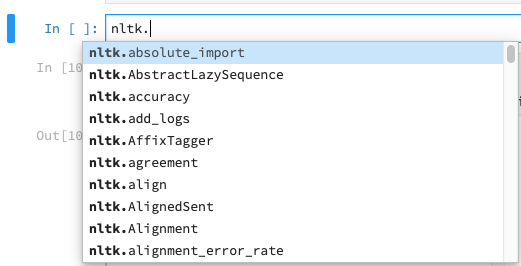

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "img/nltk.tools.png", width=400, height=400)

Also, the first time you import NLTK on your local machine, you need to download the data sets that are used in the book. You will get a pop-up window to select the datasets. The minimal data set you need is `book`. Take your time to check out the different TABs and have an idea of what is there. Make sure you have sufficient disk space to store what you want. If you have already run the download command, you can skip the next step as the data are in your local drive. If you need another dataset, rerun it and take your pick.

**Tip:** comment out *nltk.download()* after you've used it, such that you can use *Restart kernel and run all cells*

In [5]:
# nltk.download() 

Note: When you run `nltk.download()` a star will appear to the left of the code cell. A program should open, that looks like [this](https://i.stack.imgur.com/hw89E.jpg). If the program does not show, you can simply replace `nltk.download()` by `nltk.download('book')`.

Now your computer is stuffed with a lot of interesting language material!
Where is this stuff on your computer?

Depending on your OS the language stuff is stored in a new folder called "nltk_data" somehwere in the home folder of your user account. Using my_name as an example of a username, this can be one of the following:

* Mac OS: "/Users/my_name/nltk_data"
* Windows 10: "C:\Users\my_name'nltk_data"
* Linux: "/home/my_name/nltk_data"

In [6]:
ls /Users/piek/nltk_data #replace "/Users/piek/" to your the path on your own computer, replace "ls" by "dir" on a windows machine

chunkers/   grammars/   misc/       sentiment/  taggers/
corpora/    help/       models/     stemmers/   tokenizers/


You see that NLTK contains tools such as chunkers, taggers, stemmers, tokenizers but also data such as corpora. It is very useful to look into these folders and check what is there to familiarize yourself with it.

In [7]:
ls /Users/piek/nltk_data/corpora #replace "/Users/piek/" to your the path on your own computer

abc/                         opinion_lexicon.zip
abc.zip                      panlex_swadesh.zip
alpino/                      paradigms/
alpino.zip                   paradigms.zip
biocreative_ppi/             pil/
biocreative_ppi.zip          pil.zip
brown/                       pl196x/
brown.zip                    pl196x.zip
brown_tei/                   ppattach/
brown_tei.zip                ppattach.zip
cess_cat/                    problem_reports/
cess_cat.zip                 problem_reports.zip
cess_esp/                    product_reviews_1/
cess_esp.zip                 product_reviews_1.zip
chat80/                      product_reviews_2/
chat80.zip                   product_reviews_2.zip
city_database/               propbank.zip
city_database.zip            pros_cons/
cmudict/                     pros_cons.zip
cmudict.zip                  ptb/
comparative_sentences/       ptb.zip
comparative_sentences.zip    qc/
comtrans.zip                 qc.zip
conll2000/                   reut

Now you are ready to use all the tools in the toolkit and do fancy stuff with language. You find everything described and explained in the book and you should start with the instructions given in: http://www.nltk.org/book/ch01.html. To use certain data and functions you may need to import these in your python code.

Please run the following cell to check that you can import the Brown corpus (which is part of the *book* data set)

In [8]:
from nltk.corpus import brown

After importing a corpus such as 'brown' NLTK provides all kind of options for data analysis. You can find these explained in chapter 2: https://www.nltk.org/book/ch02.html

Try out the following:

In [9]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

This gives you the different text genres in Brown, the first balanced language corpus. A simple function gives the words that occur in the *news* genre:

In [10]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

The next command tells you how many there are. Too many to print to the screen!

In [11]:
len(brown.words(categories='news'))

100554

Now that you have everything installed, we can start with showing examples of text processing using NLTK.

## Sentence splitting ([NLTK Chapter 3, Section 3.8](https://www.nltk.org/book/ch03.html))
Most texts consist of a series of sentences. To be able to analyse each of them, we need to separate these sentences. We do this by creating a list of sentences.

Consider the following input that is given to a computer:

In [12]:
a_text = '''Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S. Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S. Open. H.J. Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million. It's the first group action of its kind in Britain.'''
print(a_text)

Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S. Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S. Open. H.J. Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million. It's the first group action of its kind in Britain.


Before the computer can apply most kinds of NLP tasks, it has to know what the separate sentences are.

Let's try splitting the text using a **dot**. We use a standard Python function, called "split", that is available for any string object. The function takes a single character as a parameter. We use the '.' character to split the string into a list of substrings, each approximating a sentence.

In [13]:
dot_splitted_text = a_text.split('.')
print(dot_splitted_text)

['Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U', 'S', " Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U", 'S', ' Open', ' H', 'J', ' Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd', ' for about $500 million', " It's the first group action of its kind in Britain", '']


We can now iterate over the list and print each sentence separately using the following code, where 'enumerate' provides us with the element number 'index' (starting with 0) and the presumed sentence.

What is a list and does iterating mean?

A list is a sequence of indexed objects that you can access one-by-one or by making reference to the index to the position. For example, the dot_splitted_text is a list of *strings* separated by "," when you print it.

The first element in the list is the string indexed by the number '0'. You can get it by the command dot_splitted_text[0].

In [14]:
first_element=dot_splitted_text[2]
print(first_element)

 Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U


You can ask for the length of the list as well:

In [15]:
dot_splitted_text_length=len(dot_splitted_text)
print(dot_splitted_text_length)

11


We can print an element from the list using the index:

In [16]:
element=dot_splitted_text[2]
print(element)

 Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U


You may think the last element of the list is the element on position length

In [17]:
last_element=dot_splitted_text[dot_splitted_text_length]
print('last element=',last_element)

IndexError: list index out of range

But you are mistaken because we started with '0' and not with '1'. Better try:

In [18]:
last_element=dot_splitted_text[dot_splitted_text_length-1]
print('last element=',last_element)

last element= 


As we could see from above, the last element is an empty string ''. We can als get the last element using the short hand '-1'

In [19]:
print('last element=', dot_splitted_text[-1])

last element= 


In [20]:
print('first element=', dot_splitted_text[-0])

first element= Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U


You can use a so-called for-loop to iterate over all elements in a list. The syntax is "for <name-of-variable> in <name-of-list>:". On the next line you can now do something with the "name-of-variable" which contains the next item in the list as a value. In this case we print it preceded by the word 'SENTENCE:'. There is one caveat. You need to indent the print command to carry it out within the loop.

In [21]:
for s in dot_splitted_text:
    print('SENTENCE:', s)

SENTENCE: Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U
SENTENCE: S
SENTENCE:  Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U
SENTENCE: S
SENTENCE:  Open
SENTENCE:  H
SENTENCE: J
SENTENCE:  Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd
SENTENCE:  for about $500 million
SENTENCE:  It's the first group action of its kind in Britain
SENTENCE: 


You can see that the sentence splitting using a dot clearly did not work perfectly. Many abbreviations such us **U.S.** have dots in them. However, sentences normally start with a capital letter. What would happen if we split a text using a dot followed by a space followed by a capital letter. This should work, right?

In order to that, we use a package "re" with which we can create so-called regular expressions: https://en.wikipedia.org/wiki/Regular_expression. You can learn more about regular expressions in NLTK chapter 3: https://www.nltk.org/book/ch03.html

Using the 're.split' function, we can express that we only split after a '.' only if it is followed by a space and any capital letter. Let's see if this works.


In [22]:
import re

In [23]:
print(a_text)

Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S. Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S. Open. H.J. Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million. It's the first group action of its kind in Britain.


In [24]:
splitted_using_dot_space_capital = re.split('\. [A-Z]', a_text)
for sentence in splitted_using_dot_space_capital:
    print('SENTENCE:', sentence)

SENTENCE: Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S
SENTENCE: yder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S
SENTENCE: pen
SENTENCE: .J
SENTENCE: einz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million
SENTENCE: t's the first group action of its kind in Britain.


Take you time to 'read' the regular expression and see if you understand it. Try to change it and see what happens.

Does the regular expression solve all issues? Unfortunately no. In our text, we have the following sequences:
* **U.S. Ryder**
* **H.J. Heinz Company**

Conclusion, it is actually not that easy to split a text into sentences. Luckily, NLTK contains models that are more complex than what we've just seen. Let's see how it performs on our text.

In [25]:
from nltk.tokenize import sent_tokenize

In [26]:
nltk_sentence_splitted = sent_tokenize(a_text)
for sentence in nltk_sentence_splitted:
    print('SENTENCE:', sentence)


SENTENCE: Another ex-Golden Stater, Paul Stankowski from Oxnard, is contending for a berth on the U.S. Ryder Cup team after winning his first PGA Tour event last year and staying within three strokes of the lead through three rounds of last month's U.S. Open.
SENTENCE: H.J.
SENTENCE: Heinz Company said it completed the sale of its Ore-Ida frozen-food business catering to the service industry to McCain Foods Ltd. for about $500 million.
SENTENCE: It's the first group action of its kind in Britain.


Interestingly, the model is not perfect either. It correctly determines that *U.S. Ryder Cup* is not the end of the sentence. However, it states that **H.J.** is the end of a sentence.

Imagine cryptic messages (e.g. on social media) and it is not so strange to assume that even a basic task such as sentence splitting can only be performed perfectly by completely understanding the text.

## Tokenization ([NLTK Chapter 5, Section 1](https://www.nltk.org/book/ch05.html))

One of the first steps of Natural Language Processing is tokenization. It is generally defined as chopping a text into pieces, which are called tokens. Tokenization comes after sentence splitting and is supposed to provide a list of word forms or tokens for each sentence.

What are tokens and what are types? What are words, multi word expressions, idioms, collocations? Think about this for  a while and realise that also tokenization is not trivial.

A token can be defined as an occurrence of a form and a type is a unique orthographic form. So in the previous sentence the type "a" occurs twice and the type "A" once. Each occurrence represents a different token. The number of tokens defines how long a text is in terms of a sequence of words. The number of types indicates how divers a text is in terms of different forms used.

The most naive way to apply tokenization is to split a text using spaces. Let's try this. Please run the following cell in which we split a string with an example sentence by its spaces.

In [27]:
example_sentence = "I'll refuse to permit you to obtain the refuse permit."
tokenized_using_spaces = example_sentence.split(' ')
print(tokenized_using_spaces)

["I'll", 'refuse', 'to', 'permit', 'you', 'to', 'obtain', 'the', 'refuse', 'permit.']


Think about the above line, is it actually the same as tokenizing? 

..

..

Well, yes and no. Tokenizing using spaces works for most tokens. However, it does not work for expressions such as **I'll**.

Let's try a real tokenizer that is provided by NLTK....

In [28]:
tokenized_using_tokenizer = nltk.word_tokenize(example_sentence)
print(tokenized_using_tokenizer)

['I', "'ll", 'refuse', 'to', 'permit', 'you', 'to', 'obtain', 'the', 'refuse', 'permit', '.']


Please note that **I'll** is now correctly tokenized.

## Part of speech tagging ([Chapter 5, Section 1 Using a Tagger](https://www.nltk.org/book/ch05.html))
Now that we've established the tokens in a text, a useful next step is to determine the part of speech of each token.
The part of speech is the basic morpho-syntactic category of a token. The part of speech (PoS) is useful to determine the basic syntactic structure of the sentence in terms of the constituents and their dependency relations. The next example shows a sentence with the parts of speech sequence of its words:

| the | red   | clown  | behaved  | weirdly  |
|---|---|---|---|---|
| determiner | adjective | noun | verb | adverb |

We can replace tokens with another token with the same part of speech, and the sentence will still be grammatical. For example:
* The **blue** clown behaved weirdly.
* The red **cow** behaved weirdly.
* The red clown **walked** smoothly.

NLTK also provides a method to automatically tag each token in a text with a part of speech tag. The function 'pos_tag' takes as input a list of tokens. We can thus provide the 'tokenized_using_tokenizer' output that we just created as an input.

In [29]:
tokens_with_pos_tags = nltk.pos_tag(tokenized_using_tokenizer)
print(tokens_with_pos_tags)

[('I', 'PRP'), ("'ll", 'MD'), ('refuse', 'VB'), ('to', 'TO'), ('permit', 'VB'), ('you', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN'), ('.', '.')]


We see that the 'pos_tag' function generates a list with bracketed structures containing two elements: a token followed by a PoS tag. Let's iterate over these element and check out what kind of Python objects these pairs these are. For this we use the Python function *type*:

In [30]:
for pair in tokens_with_pos_tags:
    print(type(pair))
    print(pair)

<class 'tuple'>
('I', 'PRP')
<class 'tuple'>
("'ll", 'MD')
<class 'tuple'>
('refuse', 'VB')
<class 'tuple'>
('to', 'TO')
<class 'tuple'>
('permit', 'VB')
<class 'tuple'>
('you', 'PRP')
<class 'tuple'>
('to', 'TO')
<class 'tuple'>
('obtain', 'VB')
<class 'tuple'>
('the', 'DT')
<class 'tuple'>
('refuse', 'NN')
<class 'tuple'>
('permit', 'NN')
<class 'tuple'>
('.', '.')


So the lists contains so-called 'tuples'. Tuples are Python data structures that pair more basic elements. We can get the elements by splitting the pair in the for loop by defining a variable for the first element and for the second element:

In [31]:
for token,tag in tokens_with_pos_tags:
    print(token)
    print(tag)
    break

I
PRP


Alternatively, we can directly refer to the first and second element with indices.

In [32]:
for pair in tokens_with_pos_tags:
    print(pair[0])
    print(pair[1])

I
PRP
'll
MD
refuse
VB
to
TO
permit
VB
you
PRP
to
TO
obtain
VB
the
DT
refuse
NN
permit
NN
.
.


Not only look at the Python structure and types and do not forget to look at the linguistic analysis of the text in terms of PoS. You might be surprised to see **VB** instead of **verb**. The main reason is that there is not one group of part of speech labels, there are [many](https://www.sketchengine.eu/tagsets/english-part-of-speech-tagset/)! The most popular tagset in NLP is the [Penn Treebank POS tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). This is also the default one used in NLTK.

**Tasks**: 
* Make sure you know what each tag means. 
* Try some other sentences to get an idea of how the tagger works and where it fails.

We explained before that the NLTK function *pos_tag* expects a list of tokens as input. What would happen if we give it just the sentence? Let's try to see what happens:

In [33]:
nltk.pos_tag('the red clown')

[('t', 'NN'),
 ('h', 'NN'),
 ('e', 'NN'),
 (' ', 'NNP'),
 ('r', 'NN'),
 ('e', 'NN'),
 ('d', 'NN'),
 (' ', 'NNP'),
 ('c', 'VBZ'),
 ('l', 'JJ'),
 ('o', 'JJ'),
 ('w', 'NN'),
 ('n', 'NN')]

Here we can see Python at work. It forces the string to be a list of characters and tries to assign PoS tags to each character. Be aware of this and always check if your code that the data structures you expect are also processed. When developing code, you can print intermediate results to be sure. After checling, you can add comments to the code explain what is expected.

## Stemming and lemmatizing ([NLTK book Chapter 3, Section 3.6](https://www.nltk.org/book/ch03.html))

Knowing the token and its part of speech enables us to lemmatise or stem it and to consult a dictionary or lexical resource to obtain more information. A dictionary usually has a lookup function based on the lemma and not on inflected forms such as plurals or past tense forms.

NLTK has various modules for stripping inflection of words (stemming) or finding the lemma (the form you can find in a dictionary). Below is a script to stem and lemmatize the words in a text example after tokenizing the text. We will show three different modules: Porter, Snowball and WordNet lemmatizer.

In [34]:
raw="SHUT UP! Enough already, Ballstein! Who cares about Derek Zoolander anyway? The man has only one look, for Christ's sake! Blue Steel? Ferrari? Le Tigra?"

The following cell contains a bit more code. In addition to importing the NLTK modules, we initialise them, define empty lists for storing the result and we define a for-loop over all tokens to apply each to a token and store the result in a list.

In [35]:
# Stemming and Lemmatizing
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
tokens = nltk.word_tokenize(raw)

# we create empty lists to store the results for each lemma
porterlemmas = []
wordnetlemmas = []
snowballlemmas = []

# we iterate over the tokens and call each of the three stemmers/lemmatizers to get the result 
# and put it in the corresponding result list
for word in tokens:
    porterlemmas.append(porter.stem(word))
    snowballlemmas.append(snowball.stem(word))
    wordnetlemmas.append(wordnet.lemmatize(word))

# we print each result list
print('Porter')
print(porterlemmas)
print('Snowball')
print(snowballlemmas)
print('Wordnet')
print(wordnetlemmas)

Porter
['shut', 'UP', '!', 'enough', 'alreadi', ',', 'ballstein', '!', 'who', 'care', 'about', 'derek', 'zooland', 'anyway', '?', 'the', 'man', 'ha', 'onli', 'one', 'look', ',', 'for', 'christ', "'s", 'sake', '!', 'blue', 'steel', '?', 'ferrari', '?', 'Le', 'tigra', '?']
Snowball
['shut', 'up', '!', 'enough', 'alreadi', ',', 'ballstein', '!', 'who', 'care', 'about', 'derek', 'zooland', 'anyway', '?', 'the', 'man', 'has', 'onli', 'one', 'look', ',', 'for', 'christ', "'s", 'sake', '!', 'blue', 'steel', '?', 'ferrari', '?', 'le', 'tigra', '?']
Wordnet
['SHUT', 'UP', '!', 'Enough', 'already', ',', 'Ballstein', '!', 'Who', 'care', 'about', 'Derek', 'Zoolander', 'anyway', '?', 'The', 'man', 'ha', 'only', 'one', 'look', ',', 'for', 'Christ', "'s", 'sake', '!', 'Blue', 'Steel', '?', 'Ferrari', '?', 'Le', 'Tigra', '?']


## Question:
* What do you notice as a difference?
* Can you see the difference between stemmers and lemmatizers?

## Named Entity Recognition (NER) ([NLTK Chapter 7, Section 5](https://www.nltk.org/book/ch07.html))

A more complex interpretation of tokens and sequences of tokens is the detection of named entity expressions. A named entity expression is a phrase that literally 'names' an individual or instance of a concept that exists in some real or imaginary world.

Let us look at an example. What would be named entity expressions in this sentence?

In [48]:
text = '''In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices. Samsung, which is the world's top mobile phone maker, is appealing the ruling. A similar case in the UK found in Samsung's favour and ordered Apple to publish an apology making clear that the South Korean firm had not copied its iPad when designing its own devices.'''

print(text)

In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices. Samsung, which is the world's top mobile phone maker, is appealing the ruling. A similar case in the UK found in Samsung's favour and ordered Apple to publish an apology making clear that the South Korean firm had not copied its iPad when designing its own devices.


Obvious candidates are: "Samsung", "Apples, "US", "UK", "South Korean". Perhaps less obvious candidates are "iPad", "iPhone", and specifically "Galaxy range of devices". In some approaches also dates (August) and amounts ($1.05bn, £0.66bn) would count.

What precisely constitutes the expression is controversial, e.g. "its Galaxy range of devices", "Galaxy range of devices" or just "Galaxy". Other problematic cases are nested phrases such as:

```First Lady Michelle LaVaughn Robinson Obama is a lawyer, writer, and the wife of the 44th President, Barack Obama.```

in which potential named entity expressions are nested in others. Not surprisingly, people that need to annotate text often disagree about what precisely is the so-called *span* of tokens that belong to the expression.

Thechnically, the task of finding entity expressions in a text is defined as labeling each token in a text as either being part of an Named Entity (NE) expression or not. A simple annotation of the above sentene could be as follows, where we assume it is tokenised. The "O" tag states the token is outside a NE and the "I" tag indicates it is part of an NE:

text = '''
In O
August I
, O
Samsung I
lost O
a O
US I
patent O 
case O
to O
Apple I 
and O
was O
ordered O 
to O
pay O
its O
rival O
$ I
1.05 I
bn I
( O
£ I
0.66 I
bn I
) O
in O
damages O
'''

We can see that a sentence can be treated as a sequence to tokens inside and outside such expressions.

In NLP, the goal of the  Named Entity Recognition task, also called NER, is to determine which sequences of tokens form an expression that refers to a named entity. In addition, the goal is to determine the type of entity, in which case we speak of Named Entity Recognition and Classification or NERC.

Named entities can be persons, locations, organizations, but also time expressions, prices, measurements, or events. (see [NLTK Chapter 7, Section 5](https://www.nltk.org/book/ch07.html) for more information on the task)

Typically, the task is conceived as a phrase detection task. Basically, each token is classified as being part of a named entity expression of a certain type or not. We will dive deeper into this aspect later when discussing machine learning for NLP.

Let us have a look at the NLTK module for Named Entity Recognition which is called 'ne_chunk' and apply it to some text. Before we can apply it to the text, we need to first tokenize the text, split it into sentences, and assign the part-of-speech tags to the tokens.

Why do we need to do that? Well, because 1) ne_chunk is programmed in such a way that this is expected as an input and 2) it uses the structural properties such as the part-of-speech of each token and the sequence of words and part-of-speech tags to generate the output.

We thus need to build a so-called small "NLP pipeline" as follows:

* apply 'nltk.sent_tokenize' to get a list of sentences, 
* and next iterate over each sentence to tokenize it, 
* assign part-speech-taging to each tokenized list
* apply the the named entity detection to find phrases.

The *ne_chunk* classifier is trained to assign the Named Entity Tags to tokens based on their properties and context.

We first need to import the ne_chunk function. As before, if you get an error like `ModuleNotFoundError: No module named 'numpy'`, please install the module using for example `conda install numpy` and try again. The *ne_chunk* module is dependent on this package but may not have been installed with NLTK.

In [37]:
from nltk.chunk import ne_chunk

text = '''In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices. Samsung, which is the world's top mobile phone maker, is appealing the ruling. A similar case in the UK found in Samsung's favour and ordered Apple to publish an apology making clear that the South Korean firm had not copied its iPad when designing its own devices.'''

#### Pipeline for processing a complete text to detect the NE expressions

### step 1: split the text into sentences
sentences = nltk.sent_tokenize(text)

for sentence in sentences:
    ### for each sentence in the list of sentences
    
    ### step 2: get the list of tokens
    tokens = nltk.word_tokenize(sentence)
    
    ### step 3: get the part-of-speech for each token in the list, which generates a list of tuples
    tokens_pos_tagged = nltk.pos_tag(tokens)

    ### step 4: add a named entity label to the token-PoS tuples if it is part of a NE
    tokens_pos_tagged_and_named_entities = ne_chunk(tokens_pos_tagged)
    
    print()
    print('ORIGINAL SENTENCE', sentence)
    print('NAMED ENTITY RECOGNITION INPUT', tokens_pos_tagged)
    print('NAMED ENTITY RECOGNITION OUTPUT', tokens_pos_tagged_and_named_entities)


ORIGINAL SENTENCE In August, Samsung lost a US patent case to Apple and was ordered to pay its rival $1.05bn (£0.66bn) in damages for copying features of the iPad and iPhone in its Galaxy range of devices.
NAMED ENTITY RECOGNITION INPUT [('In', 'IN'), ('August', 'NNP'), (',', ','), ('Samsung', 'NNP'), ('lost', 'VBD'), ('a', 'DT'), ('US', 'NNP'), ('patent', 'NN'), ('case', 'NN'), ('to', 'TO'), ('Apple', 'NNP'), ('and', 'CC'), ('was', 'VBD'), ('ordered', 'VBN'), ('to', 'TO'), ('pay', 'VB'), ('its', 'PRP$'), ('rival', 'JJ'), ('$', '$'), ('1.05bn', 'CD'), ('(', '('), ('£0.66bn', 'NN'), (')', ')'), ('in', 'IN'), ('damages', 'NNS'), ('for', 'IN'), ('copying', 'VBG'), ('features', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('iPad', 'NN'), ('and', 'CC'), ('iPhone', 'NN'), ('in', 'IN'), ('its', 'PRP$'), ('Galaxy', 'NNP'), ('range', 'NN'), ('of', 'IN'), ('devices', 'NNS'), ('.', '.')]
NAMED ENTITY RECOGNITION OUTPUT (S
  In/IN
  (GPE August/NNP)
  ,/,
  (PERSON Samsung/NNP)
  lost/VBD
  a/DT
  (GSP U

In the above output the Named Entity phrases, e.g. "(LOCATION South/JJ Korean/JJ)", are surrounded by brackets and preceded by the type label. We see labels such as GPE, LOCATION, PERSON. The NLTK documentation explains that these elements are in fact of the type nltk.tree.Tree. The output now has become a mixture of tuples (tokens with PoS tags) and nltk.tree elements. Check out the output for the first sentence (*sentences[0]*) with the next for loop:

In [50]:
sentence = sentences[0]
tokens = nltk.word_tokenize(sentence)
tokens_pos_tagged = nltk.pos_tag(tokens)
tokens_pos_tagged_and_named_entities = ne_chunk(tokens_pos_tagged)
for element in tokens_pos_tagged_and_named_entities:
    print(type(element))
    print(element)


<class 'tuple'>
('In', 'IN')
<class 'nltk.tree.Tree'>
(GPE August/NNP)
<class 'tuple'>
(',', ',')
<class 'nltk.tree.Tree'>
(PERSON Samsung/NNP)
<class 'tuple'>
('lost', 'VBD')
<class 'tuple'>
('a', 'DT')
<class 'nltk.tree.Tree'>
(GSP US/NNP)
<class 'tuple'>
('patent', 'NN')
<class 'tuple'>
('case', 'NN')
<class 'tuple'>
('to', 'TO')
<class 'nltk.tree.Tree'>
(GPE Apple/NNP)
<class 'tuple'>
('and', 'CC')
<class 'tuple'>
('was', 'VBD')
<class 'tuple'>
('ordered', 'VBN')
<class 'tuple'>
('to', 'TO')
<class 'tuple'>
('pay', 'VB')
<class 'tuple'>
('its', 'PRP$')
<class 'tuple'>
('rival', 'JJ')
<class 'tuple'>
('$', '$')
<class 'tuple'>
('1.05bn', 'CD')
<class 'tuple'>
('(', '(')
<class 'tuple'>
('£0.66bn', 'NN')
<class 'tuple'>
(')', ')')
<class 'tuple'>
('in', 'IN')
<class 'tuple'>
('damages', 'NNS')
<class 'tuple'>
('for', 'IN')
<class 'tuple'>
('copying', 'VBG')
<class 'tuple'>
('features', 'NNS')
<class 'tuple'>
('of', 'IN')
<class 'tuple'>
('the', 'DT')
<class 'nltk.tree.Tree'>
(ORGANIZ

Basically, the output is the list of Pos-tagged tokens as tuples that was given as the input but with nltk.tree.Tree elements if one or more tuples are extended with a Named-Entity tag. 

Is this elegant? Not according to me but that is the way the NLTK *ne_chunk* developers did it. The next for loop shows how you can process these Tree elements and get the sub-elements. Take your time to look at the statements in the for-loop and how they pick out individual elements from the structure.

In [41]:
for element in tokens_pos_tagged_and_named_entities:
    ### if the element is of the tye Tree
    if (type(element)==nltk.tree.Tree):
        ## we print the complete element
        print('Complete element from the Tree', element)
        ## we get the laberl of the element
        print("NE type", element.label())
        ## we get the first subelement
        print('First subelement is a tuple with token and pos', element[0])
        ## we get the first subsubelement
        print('First element of the tuple is the token', element[0][0])
        ## we get the second element of the first subelement
        print('Second element of the tuple is the PoS', element[0][1])
        print('\n')

Complete element from the Tree (ORGANIZATION UK/NNP)
NE type ORGANIZATION
First subelement is a tuple with token and pos ('UK', 'NNP')
First element of the tuple is the token UK
Second element of the tuple is the PoS NNP


Complete element from the Tree (GPE Samsung/NNP)
NE type GPE
First subelement is a tuple with token and pos ('Samsung', 'NNP')
First element of the tuple is the token Samsung
Second element of the tuple is the PoS NNP


Complete element from the Tree (PERSON Apple/NNP)
NE type PERSON
First subelement is a tuple with token and pos ('Apple', 'NNP')
First element of the tuple is the token Apple
Second element of the tuple is the PoS NNP


Complete element from the Tree (LOCATION South/JJ Korean/JJ)
NE type LOCATION
First subelement is a tuple with token and pos ('South', 'JJ')
First element of the tuple is the token South
Second element of the tuple is the PoS JJ




The most frequently used named entity labels are:
* ORGANIZATION (e.g., Georgia-Pacific Corp.)
* PERSON (e.g., Eddy Bonte, President Obama)
* LOCATION (e.g., Murray River, Mount Everest)
* DATE (e.g., June, 2008-06-29)
* TIME (e.g., two fifty a m, 1:30 p.m.)
* MONEY (e.g., 175 million Canadian Dollars, GBP 10.40)
* PERCENT (e.g., twenty pct, 18.75 %)
* FACILITY (e.g., Washington Monument, Stonehenge)
* GPE (=Geo-Political Entity, e.g., South East Asia, Midlothian)

Please try to understand the output from NLTK regarding named entity recognition. Reflect on the performance of this module.

## Constituency/dependency parsing ([NLTK Book Chapter 7, Section 2.1](https://www.nltk.org/book/ch07.html))

In the next section, we look into constituency parsing using NLTK. Please consider the following sentence.
- **the cat saw the dog.**

As a speaker of English, you immediately start to parse the sentence. You determine that **the cat** is the subject, **saw** is the main verb, and **the dog** is the direct object. With **constituency/dependency parsing**, we attempt to learn computers to parse sentences just like humans do.

We will use a module called **RegexpParser**, which is part of NLTK. We first represent a sentence as a list of tokens with their PoS: token-PoS pairs or tuples.

In [49]:
sentence = [("the", "DT"), ("little", "JJ"),
            ("dog", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN")]

Ahhh, too much typing. Note that we can also create the same input structure using the previous functions word_tokenize and pos_tag.

In [50]:
text="the little dog saw the cat"
tokens = nltk.word_tokenize(text)
sentence = nltk.pos_tag(tokens)
print(sentence)

[('the', 'DT'), ('little', 'JJ'), ('dog', 'NN'), ('saw', 'VBD'), ('the', 'DT'), ('cat', 'NN')]


Looks the same, except for the double quotes which are now single quotes. This is however not important.

We now will create a very simple grammar, that we extend later on. We do this by 'typing' a string with 'rewrite' rules. For those not familiar with linguistics, check out the Linguistics course and ask your teacher.

In the following cell, we define a Noun Phrase through the symbol *NP* and define it as a sequence of Parts of Speech tags: a determiner *DT* followed by a common noun *NN*. This structure is assigned as string to the variable *grammar* and we feed this to the function *RegexParser*. *RegexParser* generates a function that will apply the grammer to any list with tokens and PoS tags. We assign the resulting parser to the variable *constituent_parser* so that we can use it.

In [52]:
grammar = 'NP: {<DT> <JJ>* <NN>}'
constituent_parser = nltk.RegexpParser(grammar)

Our grammar now only contains one rule, which states that a noun phrase (NP) consists of a determiner (DT) followed by a singular noun (NN). 
The PoS tags come from the [Penn Treebank](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). Let us apply this grammar to the above sentence through our variable *constituent_parser* which has the function *parse*.

In [53]:
constituent_structure1 = constituent_parser.parse(sentence)
print(constituent_structure1)

(S (NP the/DT little/JJ dog/NN) saw/VBD (NP the/DT cat/NN))


We can use the 'draw()' function to generate a pop-up window that draws the tree. The window may be hidden behind your browser window.

In [54]:
constituent_structure1.draw()

The result is a bracketed structure of a parse tree. Nested brackets represent a lower dependent structure, so the tree is dominated by the S symbol. Below S, we find a sequence of tokens with PoS tags and at the end a noun phrase structure NP.

<img src="./img/nltk-parse.png">

**TIP**: close the pop-up window before moving on, otherwise the program will run forever. You can see that the draw cell has a star that only disappears after killing the pop-up window. You can only proceed in the notebook when you terminate this cell.

Please note that **the** and **cat** have now been identified as a noun phrase (NP). However, **the little dog** has not been identified, because we did not include that it was possible to have adjectives between the determiner and the noun. Let's fix that by inserting the adjective PoS tag *JJ*. By adding a STAR symbol * to the end, we tell the parser there can be zero or more adjectives between the determiner and the noun. In context free rewrite grammars the PLUS symbol + means one or more elements are expected.

### We add a '*' after the element <JJ> to indicate that there can be any number of adjectives including zero
grammar = 'NP: {<DT><JJ>*<NN>}'
constituent_parser = nltk.RegexpParser(grammar)

We've now changed the rule for an NP, which is now defined as:
* determiner (DT) optionally followed by one adjective (JJ) followed by a singular noun (NN)


In [47]:
constituent_structure2 = constituent_parser.parse(sentence)
print(constituent_structure2)
constituent_structure2.draw()

(S the/DT little/JJ dog/NN saw/VBD (NP the/DT cat/NN))


<img src="./img/nltk-parse-2.png">

Kill the window to continue!

You can continue to extend the grammar. Try to understand the following grammar, where we have put comments after each rule preceded by '#'. Whatever follows the '#' is ignored by the function.

In [60]:
constituent_parser = nltk.RegexpParser('''
NP: {<DT>? <JJ>* <NN>*} # NP
P: {<IN>}               # Preposition
V: {<V.*>}              # Verb
PP: {<P> <NP>}          # PP -> P NP
VP: {<V> <NP|PP>*}      # VP -> V (NP|PP)*''')

In [61]:
text="the little dog saw the cat in the tree"
tokens = nltk.word_tokenize(text)
sentence = nltk.pos_tag(tokens)

constituent_structure3 = constituent_parser.parse(sentence)
print(constituent_structure3)
constituent_structure3.draw()

(S
  (NP the/DT little/JJ dog/NN)
  (VP
    (V saw/VBD)
    (NP the/DT cat/NN)
    (PP (P in/IN) (NP the/DT tree/NN))))


<img src="./img/nltk-parser-3.png">

That's fun isn't it. You can start making your own grammar and try to describe a whole language system...... or...... try machine learning later on.

### Save tree structure to file
There are at least two ways of saving the tree structure to a file:
1. you can save the image to your Desktop or File Explorer/Finder as a PostScript fike.
2. you can use the code snippet below (might need Ghostscript installation):

In [62]:
from nltk.draw.tree import TreeView
TreeView(constituent_structure3)._cframe.print_to_file('my_parse_tree.ps')

This will save the tree structure in the folder that you are currently working on. Please convert the .ps file to PDF. It depends on the software on your local machine whether it can open a PostSrcipt file and convert it to PDF. PostScript is a language to instruct a printer. When printing a file you can usually also save it to PDF. 

If you do not manage to save the tree, don't worry. This is not important for the rest of this course.

## End of this notebook